<a href="https://colab.research.google.com/github/harjeet88/LLM_experiemnts/blob/main/LLMs_image/diffuser_slow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate scipy safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.2 MB/s eta 0:00:00


In [14]:
import torch
from diffusers import StableDiffusionPipeline

In [20]:
def generate_image(prompt: str, output_path: str, num_inference_steps: int = 50, guidance_scale: float = 7.5):
    # Load the pre-trained Stable Diffusion model
    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipe = StableDiffusionPipeline.from_pretrained(model_id)
    pipe = pipe.to(device)

    # Generate the image
    with torch.no_grad():
        image = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]

    # Save the generated image
    image.save(output_path)
    print(f"Image saved to {output_path}")
    image

In [21]:
if __name__ == "__main__":
    prompt = "A futuristic cityscape at sunset"
    output_path = "generated_image.png"
    generate_image(prompt, output_path)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to generated_image.png


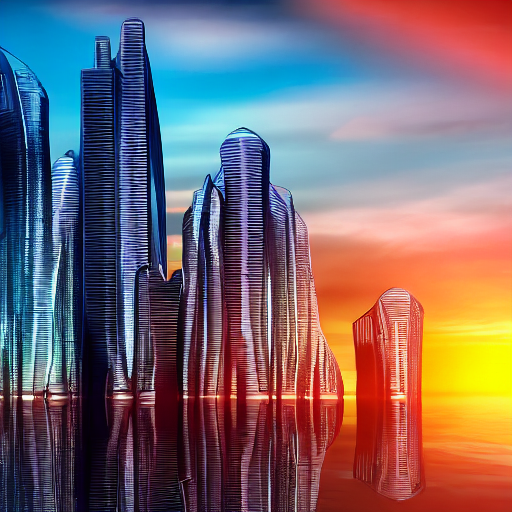

In [24]:
# prompt: display image from current directory

from IPython.display import Image
Image("generated_image.png")
